In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [18]:
# import os
# filelist = os.listdir()
filelist[114]

'000-LEC_2024_Mar_30_22h_13m_33sec_Wind.CSV'

In [19]:
# filelist
df = pd.concat(map(pd.read_csv, filelist[:72]), ignore_index=True)
df

,'Timestamp','Wind_Sensor_1_Speed','Wind_Sensor_2_Speed','Wind_Sensor_1_Direction','Wind_Sensor_2_Direction'
0,30/03/2024 12:29:57.4040,1.153557,1.171019,124.609339,151.373357
1,30/03/2024 12:29:57.4050,1.158989,1.171338,124.655332,151.580334
2,30/03/2024 12:29:57.4060,1.160587,1.167505,124.149406,151.212376
3,30/03/2024 12:29:57.4070,1.170172,1.171019,124.597841,152.304751
4,30/03/2024 12:29:57.4080,1.178480,1.172616,124.724322,153.040667
...,...,...,...,...,...
21227095,30/03/2024 18:30:21.6990,0.006771,0.191336,180.215253,227.057722
21227096,30/03/2024 18:30:21.7000,0.006771,0.190378,180.525708,227.598160
21227097,30/03/2024 18:30:21.7010,0.005493,0.190378,180.387728,227.126714
21227098,30/03/2024 18:30:21.7020,0.002937,0.188781,180.180758,226.850745


In [21]:
ws1 = df["'Wind_Sensor_1_Speed'"].to_numpy()
ws2 = df["'Wind_Sensor_2_Speed'"].to_numpy()
wd1 = df["'Wind_Sensor_1_Direction'"].to_numpy()
wd2 = df["'Wind_Sensor_2_Direction'"].to_numpy()
time = df["'Timestamp'"].to_numpy()
len(time)*0.001/60
# time[-1]

353.785

In [30]:
# filelist[137]
wind_speed1 = []
wind_speed2 = []
wind_direc1 = []
wind_direc2 = []
t = []
# t2 = []
for j in range(1, 354):
    t.append(j)
    # t2.append(time[60000*(j - 1)])
    wind_speed1.append(np.average(ws1[60000*(j - 1):60000*j - 1]))
    wind_speed2.append(np.average(ws2[60000*(j - 1):60000*j - 1]))
    wind_direc1.append(np.average(wd1[60000*(j - 1):60000*j - 1]))
    wind_direc2.append(np.average(wd2[60000*(j - 1):60000*j - 1]))

In [31]:
today_date = datetime.datetime(2024, 3, 30).date()

# Define start and end time with today's date
start_time = datetime.datetime.combine(today_date, datetime.time(hour=17, minute=59, second=40))
end_time = datetime.datetime.combine(today_date, datetime.time(hour=23, minute=59, second=59))
# start_time = datetime.datetime.strptime('05:34', '%H:%M')
# end_time = datetime.datetime.strptime('08:32', '%H:%M')

# Define length of array
array_length = len(wind_speed1)  # specify the length you desire
# array_length2 = len(wind_speed1_2)
# Calculate time difference
time_diff = end_time - start_time

# Calculate time step
time_step = time_diff / (array_length - 1)
# time_step2 = time_diff / (array_length2 - 1)
# Generate time array
time_array = [start_time + i * time_step for i in range(array_length)]
# time_array2 = [start_time + i * time_step2 for i in range(array_length2)]
# Convert time array to NumPy array if needed
time_array_np = np.array(time_array)
# time_array_np2 = np.array(time_array2)
# print(time_array_np) 
time_array_np[0]

datetime.datetime(2024, 3, 30, 17, 59, 40)

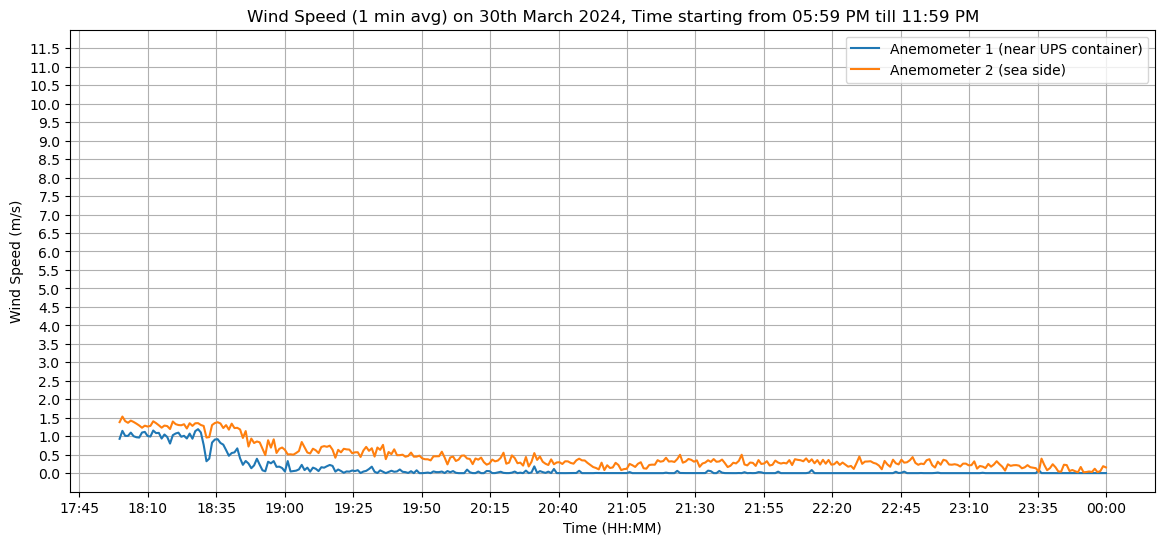

In [32]:
plt.figure(figsize=(14,6))
plt.plot(time_array_np, wind_speed1, label = 'Anemometer 1 (near UPS container)')
plt.plot(time_array_np, wind_speed2, label = 'Anemometer 2 (sea side)')
# plt.plot(time_array_np, np.add(wind_speed1, wind_speed2)/2, label = 'Avg Speed')
# plt.plot(time_array_np2, np.add(wind_speed1_2, wind_speed2_2)/2)
# plt.plot(time_array_np2, wind_speed1_2)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

# Set x-axis tick locator to display ticks every 10 minutes
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(interval=25))
plt.grid()
plt.ylabel('Wind Speed (m/s)')
plt.ylim((-0.5, 12))
plt.yticks(np.arange(0, 12, step=0.5)) 
plt.xlabel('Time (HH:MM)')
plt.legend()
plt.title('Wind Speed (1 min avg) on 30th March 2024, Time starting from 05:59 PM till 11:59 PM')
plt.savefig('30th_eve_speed.png')

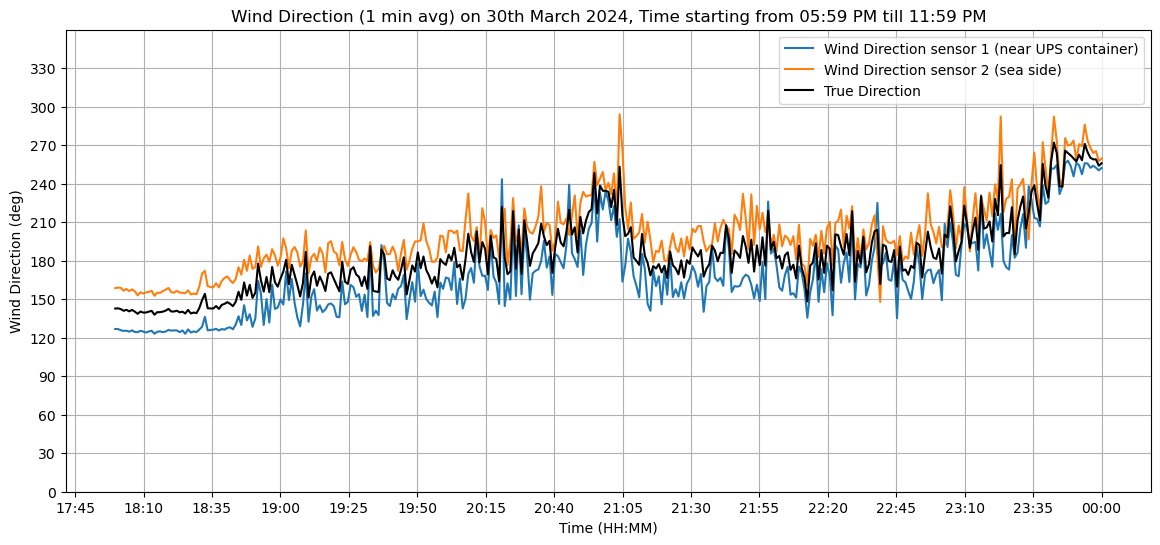

In [33]:
plt.figure(figsize=(14,6))
plt.plot(time_array_np, wind_direc1, label = 'Wind Direction sensor 1 (near UPS container)')
plt.plot(time_array_np, wind_direc2, label = 'Wind Direction sensor 2 (sea side)')
plt.plot(time_array_np, np.add(wind_direc1, wind_direc2)/2, label = 'True Direction', color='black')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

# Set x-axis tick locator to display ticks every 10 minutes
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(interval=25))
plt.grid()
plt.ylabel('Wind Direction (deg)')
plt.ylim((0,360))
plt.yticks(np.arange(0, 360, step=30))
plt.xlabel('Time (HH:MM)')
plt.legend()
plt.title('Wind Direction (1 min avg) on 30th March 2024, Time starting from 05:59 PM till 11:59 PM')
plt.savefig('30th_eve_direc.png')

In [29]:
# filelist
df2 = pd.concat(map(pd.read_csv, filelist[72:114]), ignore_index=True)
df2

,'Timestamp','Wind_Sensor_1_Speed','Wind_Sensor_2_Speed','Wind_Sensor_1_Direction','Wind_Sensor_2_Direction'
0,30/03/2024 18:30:21.7040,0.005812,0.190378,180.169260,226.494286
1,30/03/2024 18:30:21.7050,0.007730,0.192294,180.353233,226.540281
2,30/03/2024 18:30:21.7060,0.005812,0.189100,180.445220,226.586275
3,30/03/2024 18:30:21.7070,0.002617,0.187503,180.353233,226.218317
4,30/03/2024 18:30:21.7080,0.003576,0.186545,180.686685,226.264312
...,...,...,...,...,...
12323095,30/03/2024 21:55:44.7990,0.006771,0.017568,254.298981,267.958555
12323096,30/03/2024 21:55:44.8000,0.007410,0.017887,253.988526,267.326127
12323097,30/03/2024 21:55:44.8010,0.008049,0.020123,253.885041,267.268633
12323098,30/03/2024 21:55:44.8020,0.001019,0.015332,254.080512,267.326127


In [34]:
ws1_2 = df2["'Wind_Sensor_1_Speed'"].to_numpy()
ws2_2 = df2["'Wind_Sensor_2_Speed'"].to_numpy()
wd1_2 = df2["'Wind_Sensor_1_Direction'"].to_numpy()
wd2_2 = df2["'Wind_Sensor_2_Direction'"].to_numpy()
time_2 = df2["'Timestamp'"].to_numpy()
len(time_2)*0.001/60
# time[-1]

205.38500000000002

In [39]:
# filelist[137]
wind_speed1_2 = []
wind_speed2_2 = []
wind_direc1_2 = []
wind_direc2_2 = []
t_2 = []
# t2 = []
for j in range(1, 206):
    t_2.append(j)
    # t2.append(time[60000*(j - 1)])
    wind_speed1_2.append(np.average(ws1_2[60000*(j - 1):60000*j - 1]))
    wind_speed2_2.append(np.average(ws2_2[60000*(j - 1):60000*j - 1]))
    wind_direc1_2.append(np.average(wd1_2[60000*(j - 1):60000*j - 1]))
    wind_direc2_2.append(np.average(wd2_2[60000*(j - 1):60000*j - 1]))
len(wind_speed1_2)

205

In [42]:
today_date_2 = datetime.datetime(2024, 3, 31).date()

# Define start and end time with today's date
start_time_2 = datetime.datetime.combine(today_date_2, datetime.time(hour=0, minute=0, second=21))
end_time_2 = datetime.datetime.combine(today_date_2, datetime.time(hour=3, minute=25, second=44))
# start_time = datetime.datetime.strptime('05:34', '%H:%M')
# end_time = datetime.datetime.strptime('08:32', '%H:%M')

# Define length of array
array_length_2 = len(wind_speed1_2)  # specify the length you desire
# array_length2 = len(wind_speed1_2)
# Calculate time difference
time_diff_2 = end_time_2 - start_time_2

# Calculate time step
time_step_2 = time_diff_2 / (array_length_2 - 1)
# time_step2 = time_diff / (array_length2 - 1)
# Generate time array
time_array_2 = [start_time_2 + i * time_step_2 for i in range(array_length_2)]
# time_array2 = [start_time + i * time_step2 for i in range(array_length2)]
# Convert time array to NumPy array if needed
time_array_np_2 = np.array(time_array_2)
# time_array_np2 = np.array(time_array2)
# print(time_array_np) 
time_array_np_2[-1]

datetime.datetime(2024, 3, 31, 3, 25, 44, 52)

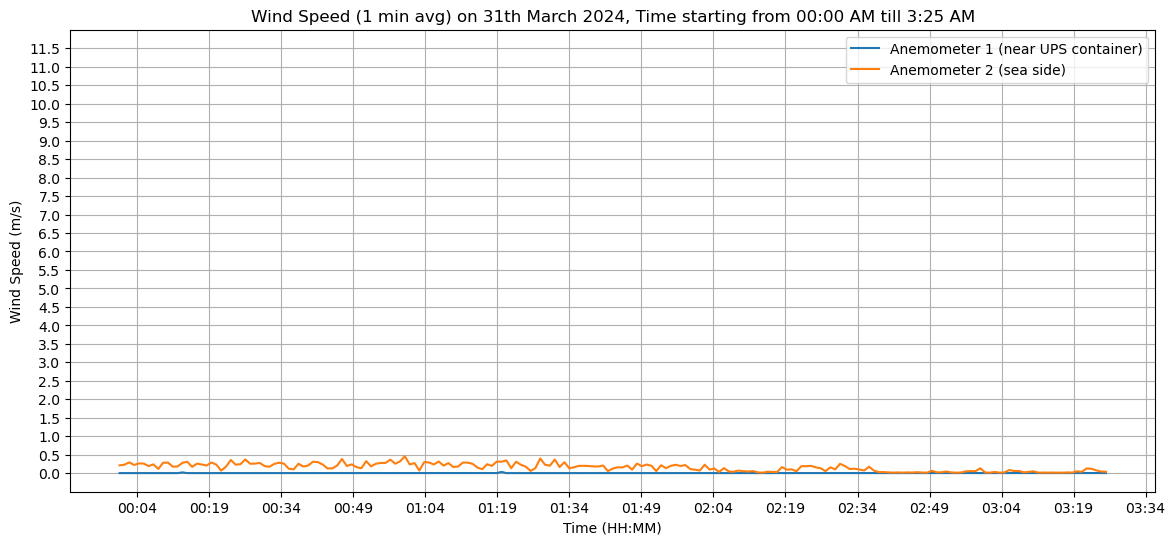

In [44]:
plt.figure(figsize=(14,6))
plt.plot(time_array_np_2, wind_speed1_2, label = 'Anemometer 1 (near UPS container)')
plt.plot(time_array_np_2, wind_speed2_2, label = 'Anemometer 2 (sea side)')
# plt.plot(time_array_np, np.add(wind_speed1, wind_speed2)/2, label = 'Avg Speed')
# plt.plot(time_array_np2, np.add(wind_speed1_2, wind_speed2_2)/2)
# plt.plot(time_array_np2, wind_speed1_2)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

# Set x-axis tick locator to display ticks every 10 minutes
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(interval=15))
plt.grid()
plt.ylabel('Wind Speed (m/s)')
plt.ylim((-0.5, 12))
plt.yticks(np.arange(0, 12, step=0.5)) 
plt.xlabel('Time (HH:MM)')
plt.legend()
plt.title('Wind Speed (1 min avg) on 31th March 2024, Time starting from 00:00 AM till 3:25 AM')
plt.savefig('31th_morn_1_speed.png')

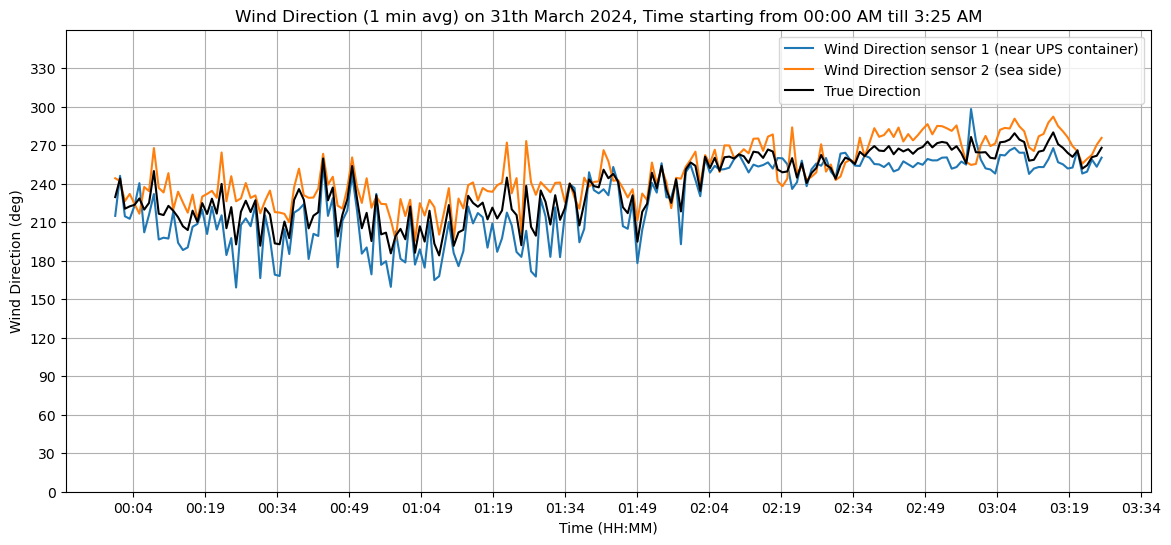

In [57]:
plt.figure(figsize=(14,6))
plt.plot(time_array_np_2, wind_direc1_2, label = 'Wind Direction sensor 1 (near UPS container)')
plt.plot(time_array_np_2, wind_direc2_2, label = 'Wind Direction sensor 2 (sea side)')
plt.plot(time_array_np_2, np.add(wind_direc1_2, wind_direc2_2)/2, label = 'True Direction', color='black')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

# Set x-axis tick locator to display ticks every 10 minutes
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(interval=15))
plt.grid()
plt.ylabel('Wind Direction (deg)')
plt.ylim((0,360))
plt.yticks(np.arange(0, 360, step=30))
plt.xlabel('Time (HH:MM)')
plt.legend()
plt.title('Wind Direction (1 min avg) on 31th March 2024, Time starting from 00:00 AM till 3:25 AM')
plt.savefig('31th_morn_1_direc.png')

In [49]:
df3 = pd.concat(map(pd.read_csv, filelist[114:]), ignore_index=True)
df3

,'Timestamp','Wind_Sensor_1_Speed','Wind_Sensor_2_Speed','Wind_Sensor_1_Direction','Wind_Sensor_2_Direction'
0,30/03/2024 22:13:33.0060,0.005812,0.019165,261.841884,296.222330
1,30/03/2024 22:13:33.0070,0.007091,0.018845,262.129342,296.590288
2,30/03/2024 22:13:33.0080,0.006451,0.018207,262.911228,297.452689
3,30/03/2024 22:13:33.0090,0.006132,0.018526,261.979864,296.429306
4,30/03/2024 22:13:33.0100,0.006451,0.017887,262.037355,296.590288
...,...,...,...,...,...
23119495,31/03/2024 04:38:52.5010,0.452513,1.257903,125.092269,208.234369
23119496,31/03/2024 04:38:52.5020,0.448039,1.255347,124.954289,207.854913
23119497,31/03/2024 04:38:52.5030,0.446761,1.256945,124.839306,207.498453
23119498,31/03/2024 04:38:52.5040,0.449317,1.257264,124.873801,207.463957


In [50]:
ws1_3 = df3["'Wind_Sensor_1_Speed'"].to_numpy()
ws2_3 = df3["'Wind_Sensor_2_Speed'"].to_numpy()
wd1_3 = df3["'Wind_Sensor_1_Direction'"].to_numpy()
wd2_3 = df3["'Wind_Sensor_2_Direction'"].to_numpy()
time_3 = df3["'Timestamp'"].to_numpy()
len(time_3)*0.001/60
# time[-1]

385.325

In [51]:
# filelist[137]
wind_speed1_3 = []
wind_speed2_3 = []
wind_direc1_3 = []
wind_direc2_3 = []
t_3 = []
# t2 = []
for j in range(1, 386):
    t_3.append(j)
    # t2.append(time[60000*(j - 1)])
    wind_speed1_3.append(np.average(ws1_3[60000*(j - 1):60000*j - 1]))
    wind_speed2_3.append(np.average(ws2_3[60000*(j - 1):60000*j - 1]))
    wind_direc1_3.append(np.average(wd1_3[60000*(j - 1):60000*j - 1]))
    wind_direc2_3.append(np.average(wd2_3[60000*(j - 1):60000*j - 1]))
len(wind_speed1_3)

385

In [52]:
today_date_3 = datetime.datetime(2024, 3, 31).date()

# Define start and end time with today's date
start_time_3 = datetime.datetime.combine(today_date_3, datetime.time(hour=3, minute=43, second=33))
end_time_3 = datetime.datetime.combine(today_date_3, datetime.time(hour=10, minute=8, second=52))
# start_time = datetime.datetime.strptime('05:34', '%H:%M')
# end_time = datetime.datetime.strptime('08:32', '%H:%M')

# Define length of array
array_length_3 = len(wind_speed1_3)  # specify the length you desire
# array_length2 = len(wind_speed1_2)
# Calculate time difference
time_diff_3 = end_time_3 - start_time_3

# Calculate time step
time_step_3 = time_diff_3 / (array_length_3 - 1)
# time_step2 = time_diff / (array_length2 - 1)
# Generate time array
time_array_3 = [start_time_3 + i * time_step_3 for i in range(array_length_3)]
# time_array2 = [start_time + i * time_step2 for i in range(array_length2)]
# Convert time array to NumPy array if needed
time_array_np_3 = np.array(time_array_3)
# time_array_np2 = np.array(time_array2)
# print(time_array_np) 
time_array_np_3[-1]

datetime.datetime(2024, 3, 31, 10, 8, 51, 999936)

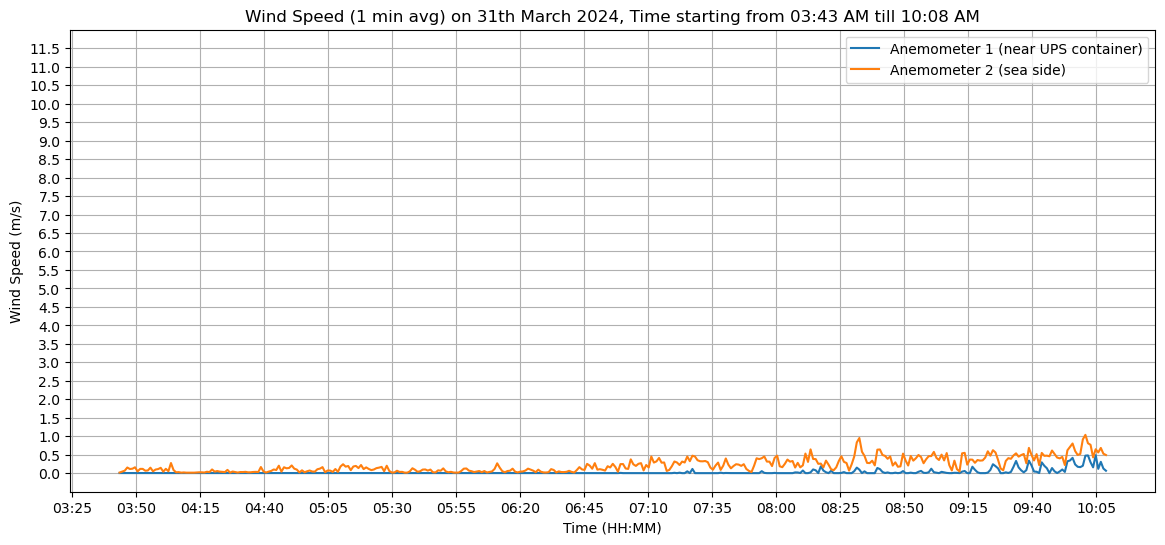

In [55]:
plt.figure(figsize=(14,6))
plt.plot(time_array_np_3, wind_speed1_3, label = 'Anemometer 1 (near UPS container)')
plt.plot(time_array_np_3, wind_speed2_3, label = 'Anemometer 2 (sea side)')
# plt.plot(time_array_np, np.add(wind_speed1, wind_speed2)/2, label = 'Avg Speed')
# plt.plot(time_array_np2, np.add(wind_speed1_2, wind_speed2_2)/2)
# plt.plot(time_array_np2, wind_speed1_2)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

# Set x-axis tick locator to display ticks every 10 minutes
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(interval=25))
plt.grid()
plt.ylabel('Wind Speed (m/s)')
plt.ylim((-0.5, 12))
plt.yticks(np.arange(0, 12, step=0.5)) 
plt.xlabel('Time (HH:MM)')
plt.legend()
plt.title('Wind Speed (1 min avg) on 31th March 2024, Time starting from 03:43 AM till 10:08 AM')
plt.savefig('31th_morn_2_speed.png')

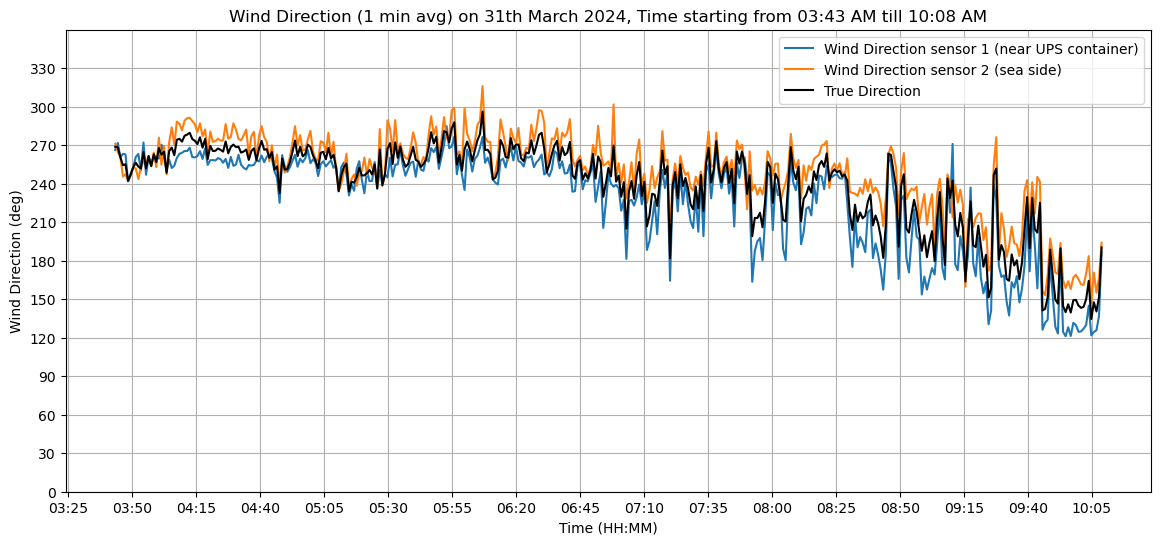

In [58]:
plt.figure(figsize=(14,6))
plt.plot(time_array_np_3, wind_direc1_3, label = 'Wind Direction sensor 1 (near UPS container)')
plt.plot(time_array_np_3, wind_direc2_3, label = 'Wind Direction sensor 2 (sea side)')
plt.plot(time_array_np_3, np.add(wind_direc1_3, wind_direc2_3)/2, label = 'True Direction', color='black')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

# Set x-axis tick locator to display ticks every 10 minutes
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(interval=25))
plt.grid()
plt.ylabel('Wind Direction (deg)')
plt.ylim((0,360))
plt.yticks(np.arange(0, 360, step=30))
plt.xlabel('Time (HH:MM)')
plt.legend()
plt.title('Wind Direction (1 min avg) on 31th March 2024, Time starting from 03:43 AM till 10:08 AM')
plt.savefig('31th_morn_2_direc.png')